In [2]:
# STEP 1: INSTALL ALL NECESSARY LIBRARIES
# This command works perfectly in Google Colab.
print("STEP 1: Installing libraries...")
!pip install pandas numpy matplotlib seaborn statsmodels scikit-learn -q
print("✅ Libraries installed successfully!\n")


STEP 1: Installing libraries...
✅ Libraries installed successfully!



In [3]:
# STEP 2: IMPORT LIBRARIES AND SETUP
print("STEP 2: Importing libraries...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Ignore warnings to keep the output clean
warnings.filterwarnings("ignore")
# Set plot style
sns.set_style("whitegrid")
print("✅ Libraries imported successfully!\n")

STEP 2: Importing libraries...
✅ Libraries imported successfully!



In [4]:
# STEP 3: LOAD THE CLEANED DATASET
# IMPORTANT: Make sure you have uploaded 'cleaned_transactions.csv' to Colab first!
print("STEP 3: Loading the dataset...")
try:
    df = pd.read_csv('cleaned_transactions.csv', parse_dates=['date'])
    print("✅ Dataset loaded successfully!\n")
except FileNotFoundError:
    print("❌ ERROR: 'cleaned_transactions.csv' not found. Please upload the file using the folder icon on the left sidebar.")
    # Stop the script if the file isn't found
    exit()

STEP 3: Loading the dataset...
✅ Dataset loaded successfully!



In [5]:

# STEP 4: PREPARE DATA FOR TIME SERIES FORECASTING
print("STEP 4: Preparing data for time series analysis...")
# Filter for expenses only and set date as the index
expenses_df = df[df['transaction_type'] == 'expense'].copy()
expenses_df.set_index('date', inplace=True)
# Resample to get the sum of all expenses for each day
daily_expenses = expenses_df['amount'].resample('D').sum().fillna(0)
print("✅ Data successfully aggregated to daily total expenses.\n")


STEP 4: Preparing data for time series analysis...
✅ Data successfully aggregated to daily total expenses.



STEP 5: Visualizing the daily expense data...


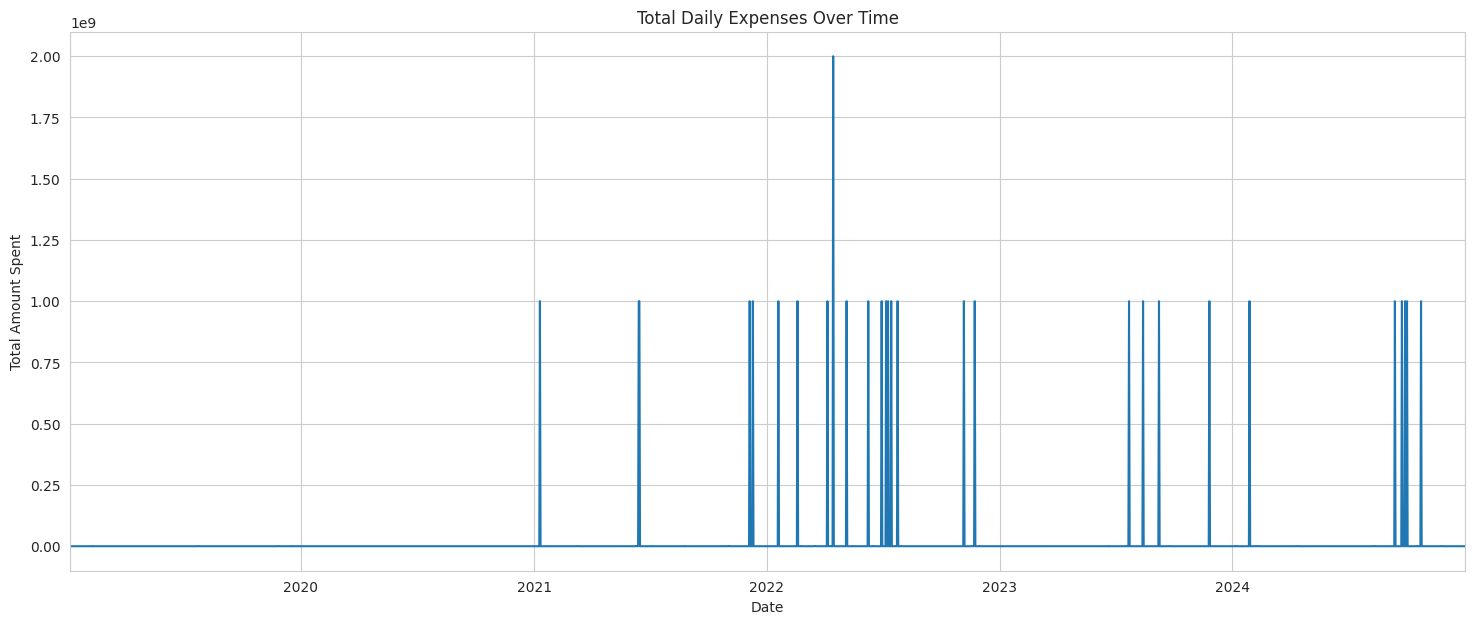

In [6]:
# STEP 5: VISUALIZE THE DAILY EXPENSES (EDA)
print("STEP 5: Visualizing the daily expense data...")
plt.figure(figsize=(18, 7))
daily_expenses.plot(title='Total Daily Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount Spent')
plt.grid(True)
plt.show()

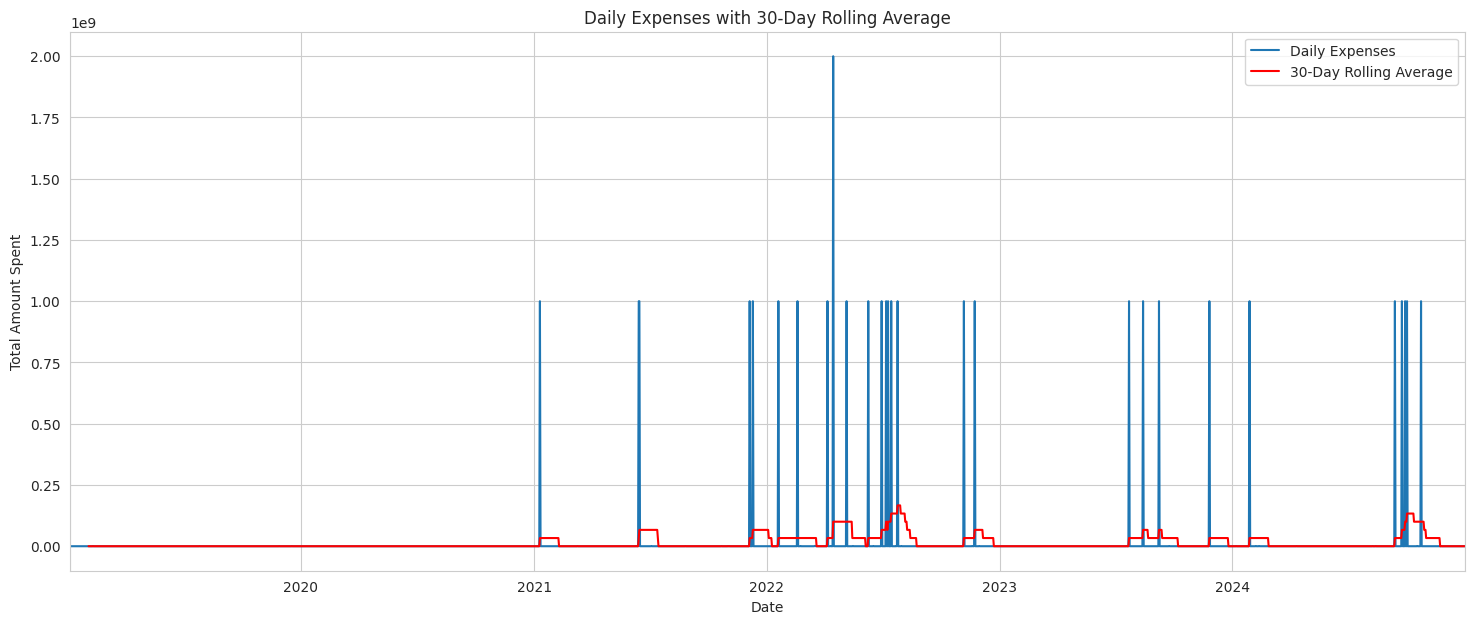

✅ EDA visualization complete.



In [7]:
rolling_avg = daily_expenses.rolling(window=30).mean()
plt.figure(figsize=(18, 7))
daily_expenses.plot(label='Daily Expenses')
rolling_avg.plot(color='red', label='30-Day Rolling Average')
plt.title('Daily Expenses with 30-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Total Amount Spent')
plt.legend()
plt.grid(True)
plt.show()
print("✅ EDA visualization complete.\n")

In [9]:
# STEP 6: BUILD BASELINE MODEL - ARIMA
print("STEP 6: Building our first forecasting model (ARIMA)...")

# Split data into training and testing sets
# We'll use the last 60 days for testing and the rest for training
train_data = daily_expenses[:-60]
test_data = daily_expenses[-60:]
print(f"Training data points: {len(train_data)}")
print(f"Testing data points: {len(test_data)}")

# Define the ARIMA model
# ARIMA(p,d,q) - (Autoregressive, Integrated, Moving Average)
# We'll start with a common baseline order of (5,1,1)
model = ARIMA(train_data, order=(5, 1, 1))

# Fit the model
print("\nTraining the ARIMA model... (This may take a moment)")
model_fit = model.fit()
print("✅ Model training complete.")
# Make predictions
start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_index, end=end_index)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"\nModel Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(" (This means, on average, the model's daily forecast is off by this amount.)\n")


STEP 6: Building our first forecasting model (ARIMA)...
Training data points: 2129
Testing data points: 60

Training the ARIMA model... (This may take a moment)
✅ Model training complete.

Model Evaluation:
Root Mean Squared Error (RMSE): 37824115.22
 (This means, on average, the model's daily forecast is off by this amount.)



STEP 7: Visualizing the forecast against actual values...


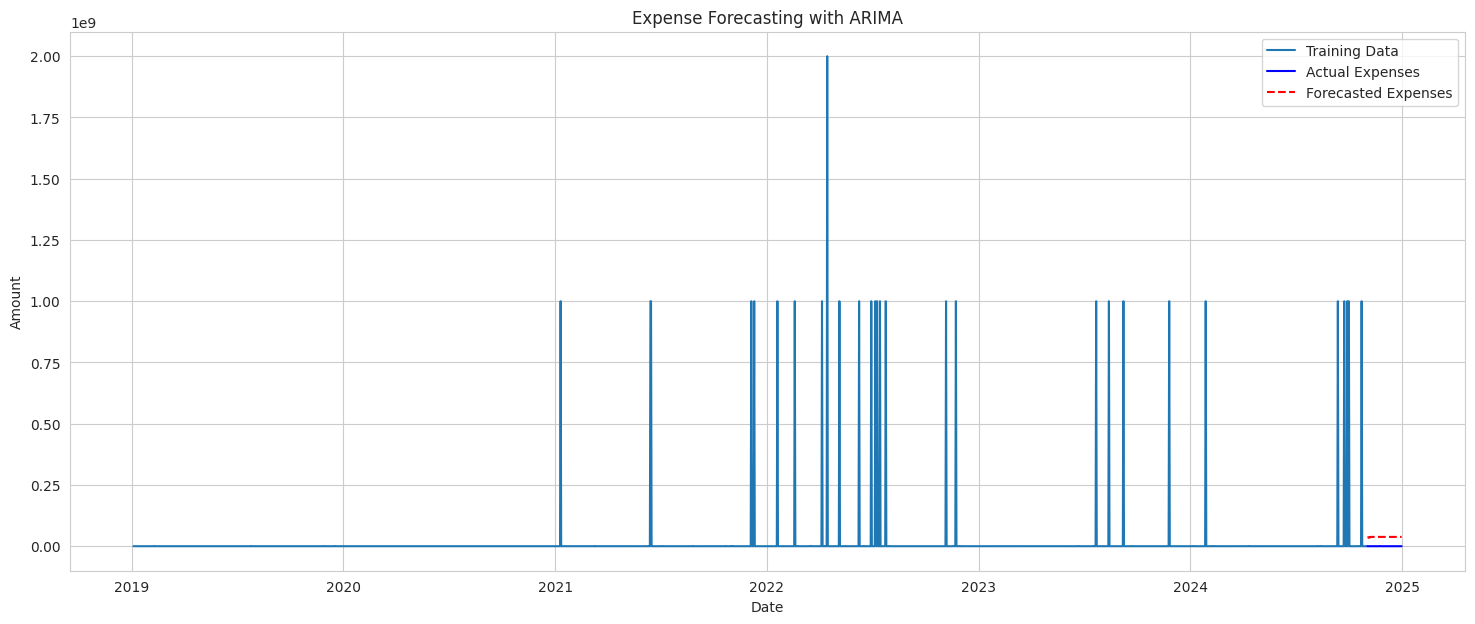


--- SCRIPT COMPLETE ---


In [10]:

# STEP 7: VISUALIZE THE FORECAST
print("STEP 7: Visualizing the forecast against actual values...")
plt.figure(figsize=(18, 7))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, color='blue', label='Actual Expenses')
plt.plot(predictions.index, predictions, color='red', linestyle='--', label='Forecasted Expenses')
plt.title('Expense Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- SCRIPT COMPLETE ---")

--- Analyzing the scale of Daily Expenses ---
count    2.189000e+03
mean     1.327496e+07
std      1.182893e+08
min     -1.000000e+03
25%      7.420000e+02
50%      7.456000e+03
75%      1.867400e+04
max      2.000008e+09
Name: amount, dtype: float64


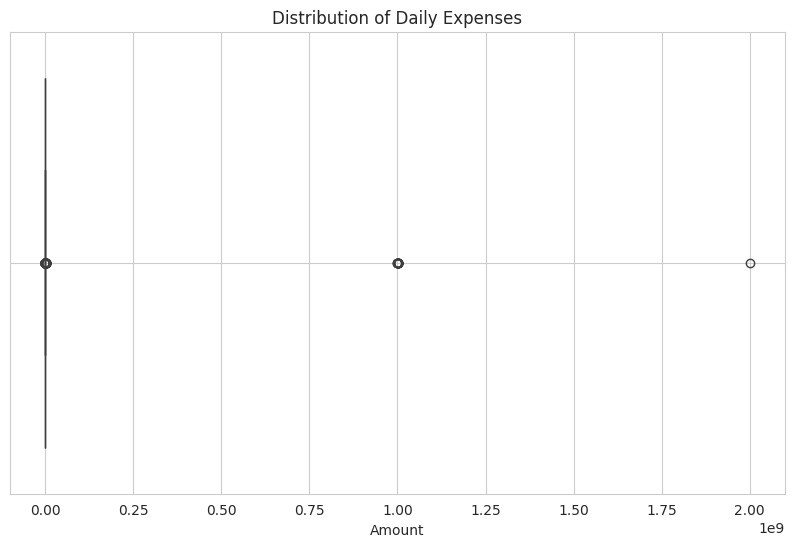

In [11]:
print("--- Analyzing the scale of Daily Expenses ---")
print(daily_expenses.describe())

# A boxplot is excellent for visualizing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=daily_expenses)
plt.title('Distribution of Daily Expenses')
plt.xlabel('Amount')
plt.grid(True)
plt.show()

STEP 9: Retraining ARIMA on log-transformed data to handle outliers...

Training the new model on transformed data...
✅ New model training complete.

New Model Evaluation:
Old RMSE: 37824115.22
New RMSE on Transformed Data: 128684.12

Visualizing the new, improved forecast...


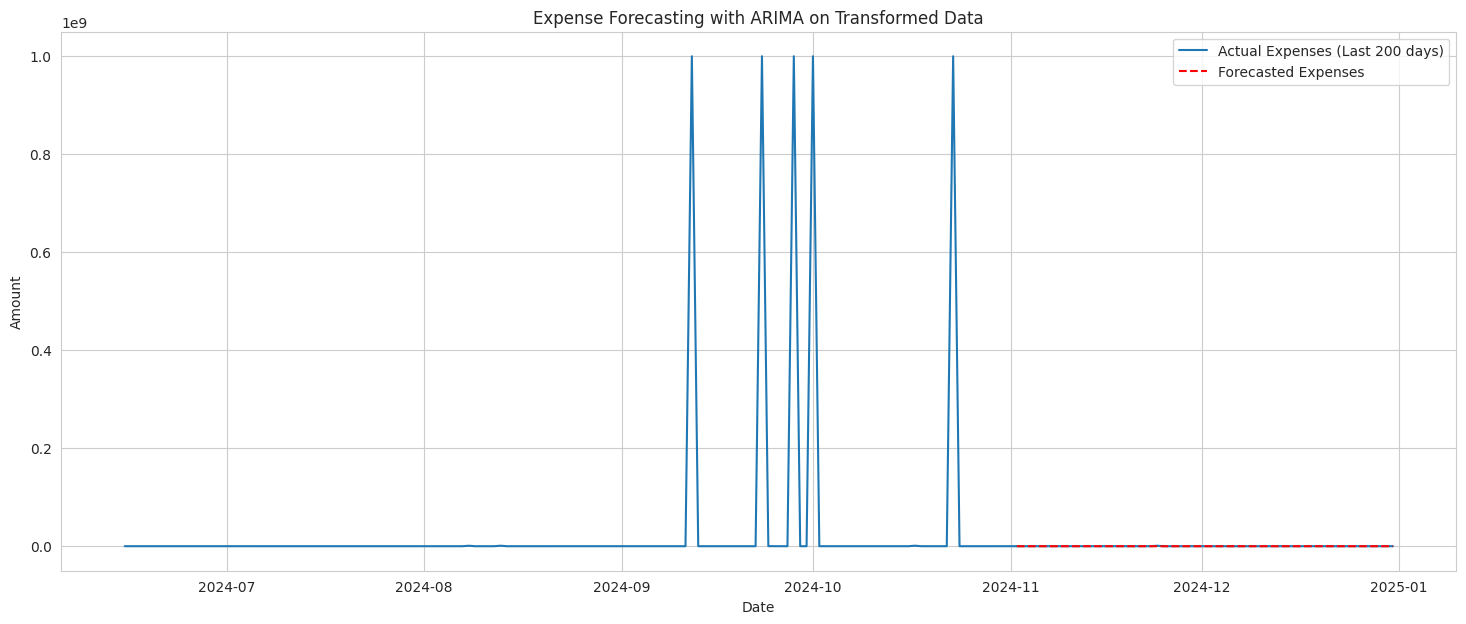

In [12]:
# ==============================================================================
# STEP 9: RETRAIN ARIMA ON LOG-TRANSFORMED DATA
# ==============================================================================
print("STEP 9: Retraining ARIMA on log-transformed data to handle outliers...")

# Apply a log transformation. We use log1p which is log(1+x) to handle days with 0 expense.
log_daily_expenses = np.log1p(daily_expenses)

# Split the TRANSFORMED data
train_log = log_daily_expenses[:-60]
test_log = log_daily_expenses[-60:]

# Define and fit the ARIMA model on the LOG data
model_log = ARIMA(train_log, order=(5, 1, 1))
print("\nTraining the new model on transformed data...")
model_log_fit = model_log.fit()
print("✅ New model training complete.")

# Make predictions (they will be in log scale)
start_index = len(train_log)
end_index = len(train_log) + len(test_log) - 1
log_predictions = model_log_fit.predict(start=start_index, end=end_index)

# IMPORTANT: We must INVERSE TRANSFORM the predictions to bring them back to the original scale
predictions_original_scale = np.expm1(log_predictions)
# Also get the original test data for comparison
test_data_original_scale = np.expm1(test_log)


# Evaluate the new model
new_rmse = np.sqrt(mean_squared_error(test_data_original_scale, predictions_original_scale))
print(f"\nNew Model Evaluation:")
print(f"Old RMSE: {rmse:.2f}")
print(f"New RMSE on Transformed Data: {new_rmse:.2f}\n")


# Visualize the new forecast
print("Visualizing the new, improved forecast...")
plt.figure(figsize=(18, 7))
plt.plot(daily_expenses[-200:], label='Actual Expenses (Last 200 days)') # Plotting a smaller window for clarity
plt.plot(predictions_original_scale, color='red', linestyle='--', label='Forecasted Expenses')
plt.title('Expense Forecasting with ARIMA on Transformed Data')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

STEP 10: Building a second baseline model using Facebook Prophet...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcfejywb/cpuzbyer.json



Training the Prophet model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcfejywb/asi1pfec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=984', 'data', 'file=/tmp/tmpzcfejywb/cpuzbyer.json', 'init=/tmp/tmpzcfejywb/asi1pfec.json', 'output', 'file=/tmp/tmpzcfejywb/prophet_modeljjjx6zqs/prophet_model-20251009071454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Prophet model training complete.

Prophet Model Evaluation:
ARIMA RMSE: 128684.12
Prophet RMSE: 129664.35

Prophet did not outperform the ARIMA baseline on this data.

Visualizing the Prophet forecast...


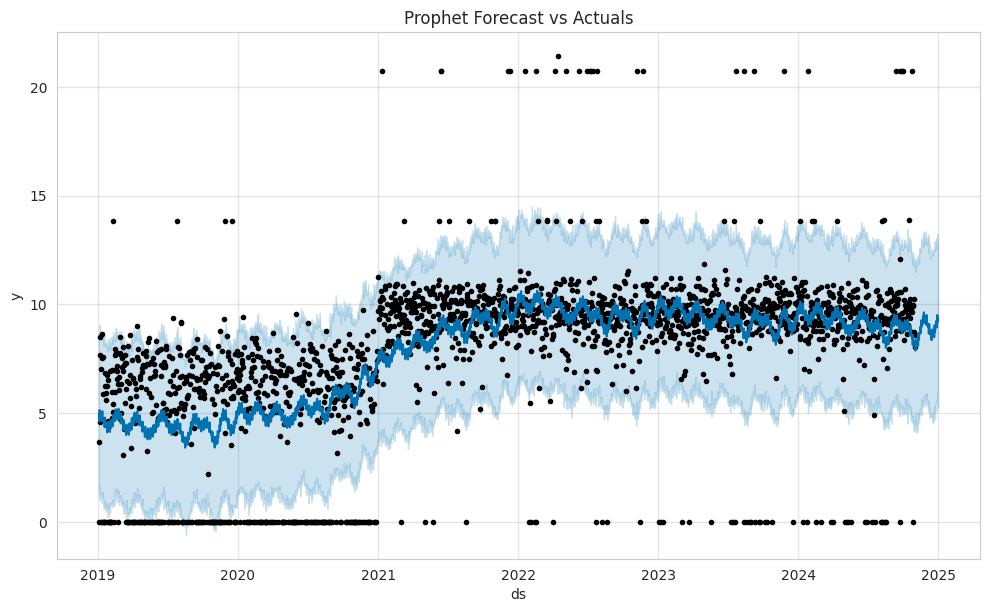

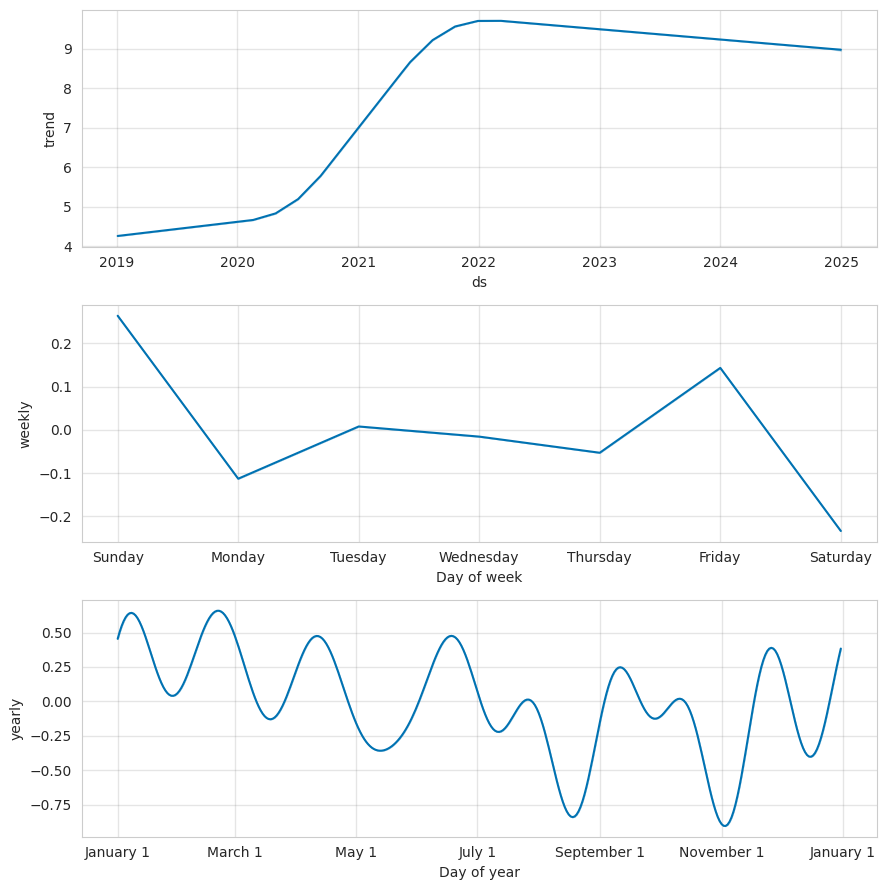


--- PROPHET MODELING COMPLETE ---


In [13]:
# ==============================================================================
# STEP 10: BUILDING A SECOND BASELINE MODEL - PROPHET
# ==============================================================================
print("STEP 10: Building a second baseline model using Facebook Prophet...")

# Import the Prophet library
from prophet import Prophet

# Prophet requires the data to be in a specific format:
# - The date column must be named 'ds'
# - The value column must be named 'y'

# We will use our log-transformed data as it worked so well
prophet_df = log_daily_expenses.reset_index()
prophet_df.columns = ['ds', 'y']

# Split the data for Prophet
train_prophet = prophet_df[:-60]
test_prophet = prophet_df[-60:]

# --- Train the Prophet Model ---
# Prophet is highly automated. We just instantiate and fit.
model_prophet = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
print("\nTraining the Prophet model...")
model_prophet.fit(train_prophet)
print("✅ Prophet model training complete.")


# --- Make Predictions ---
# Create a dataframe for the future dates we want to predict
future_dates = model_prophet.make_future_dataframe(periods=60, freq='D')
forecast = model_prophet.predict(future_dates)

# Extract the 60 predictions for our test period
predictions_prophet_log = forecast['yhat'][-60:]

# Inverse transform the predictions back to the original currency scale
predictions_prophet_original = np.expm1(predictions_prophet_log)
test_data_original = np.expm1(test_prophet['y'])


# --- Evaluate the Prophet Model ---
rmse_prophet = np.sqrt(mean_squared_error(test_data_original, predictions_prophet_original))
print(f"\nProphet Model Evaluation:")
print(f"ARIMA RMSE: {new_rmse:.2f}")
print(f"Prophet RMSE: {rmse_prophet:.2f}\n")

if rmse_prophet < new_rmse:
    print("🎉 Success! Prophet outperformed our ARIMA baseline.")
else:
    print("Prophet did not outperform the ARIMA baseline on this data.")


# --- Visualize the Prophet Forecast ---
print("\nVisualizing the Prophet forecast...")
# Prophet has excellent built-in plotting functions
fig1 = model_prophet.plot(forecast)
plt.title('Prophet Forecast vs Actuals')
plt.show()

# We can also see the components of the forecast (trend, weekly patterns, etc.)
fig2 = model_prophet.plot_components(forecast)
plt.show()

print("\n--- PROPHET MODELING COMPLETE ---")

In [14]:
# = a============================================================================
# STEP 11: FEATURE ENGINEERING FOR MACHINE LEARNING MODELS
# ==============================================================================
print("STEP 11: Creating features for ML models...")

def create_features(df):
    """
    Creates time series features from a datetime index.
    """
    df_new = df.copy()
    df_new['dayofweek'] = df_new.index.dayofweek
    df_new['quarter'] = df_new.index.quarter
    df_new['month'] = df_new.index.month
    df_new['year'] = df_new.index.year
    df_new['dayofyear'] = df_new.index.dayofyear
    df_new['weekofyear'] = df_new.index.isocalendar().week.astype(int)
    return df_new

# Start with our daily_expenses series and convert to a dataframe
ml_df = pd.DataFrame(daily_expenses)
ml_df.columns = ['expenses']

# Create time-based features
ml_df = create_features(ml_df)

# Create lag features (spending from previous days)
# This is how the model gets a sense of "memory"
ml_df['lag_1'] = ml_df['expenses'].shift(1) # Yesterday's spending
ml_df['lag_7'] = ml_df['expenses'].shift(7) # Spending from one week ago

# Create rolling window features
ml_df['rolling_mean_7'] = ml_df['expenses'].rolling(window=7).mean()
ml_df['rolling_std_7'] = ml_df['expenses'].rolling(window=7).std()

# The first few rows will have NaNs because there's no prior data for lags/rolling windows
ml_df.dropna(inplace=True)

print("✅ Feature engineering complete.")
print("Here are the first few rows of our new dataset for Machine Learning:")
print(ml_df.head())

STEP 11: Creating features for ML models...
✅ Feature engineering complete.
Here are the first few rows of our new dataset for Machine Learning:
            expenses  dayofweek  quarter  month  year  dayofyear  weekofyear  \
date                                                                           
2019-01-11    5646.0          4        1      1  2019         11           2   
2019-01-12       0.0          5        1      1  2019         12           2   
2019-01-13    1852.0          6        1      1  2019         13           2   
2019-01-14    1974.0          0        1      1  2019         14           3   
2019-01-15       0.0          1        1      1  2019         15           3   

             lag_1   lag_7  rolling_mean_7  rolling_std_7  
date                                                       
2019-01-11     0.0    39.0     1996.142857    2394.026206  
2019-01-12  5646.0     0.0     1996.142857    2394.026206  
2019-01-13     0.0  4957.0     1552.571429    2011.010

STEP 12: Training an XGBoost model...

Training the XGBoost model...
✅ XGBoost model training complete.

XGBoost Model Evaluation:
ARIMA RMSE: 128684.12
XGBoost RMSE: 129530.82

XGBoost did not outperform the ARIMA baseline.

Visualizing the XGBoost forecast...


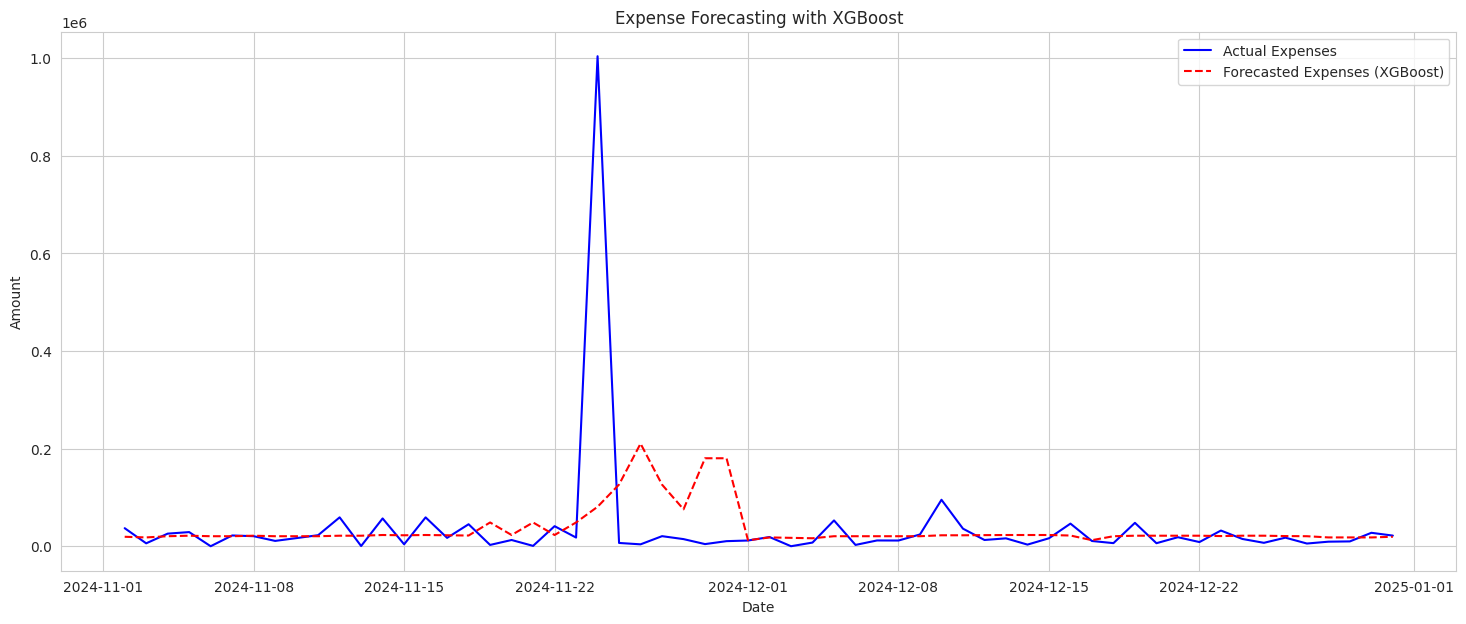


Analyzing feature importance...


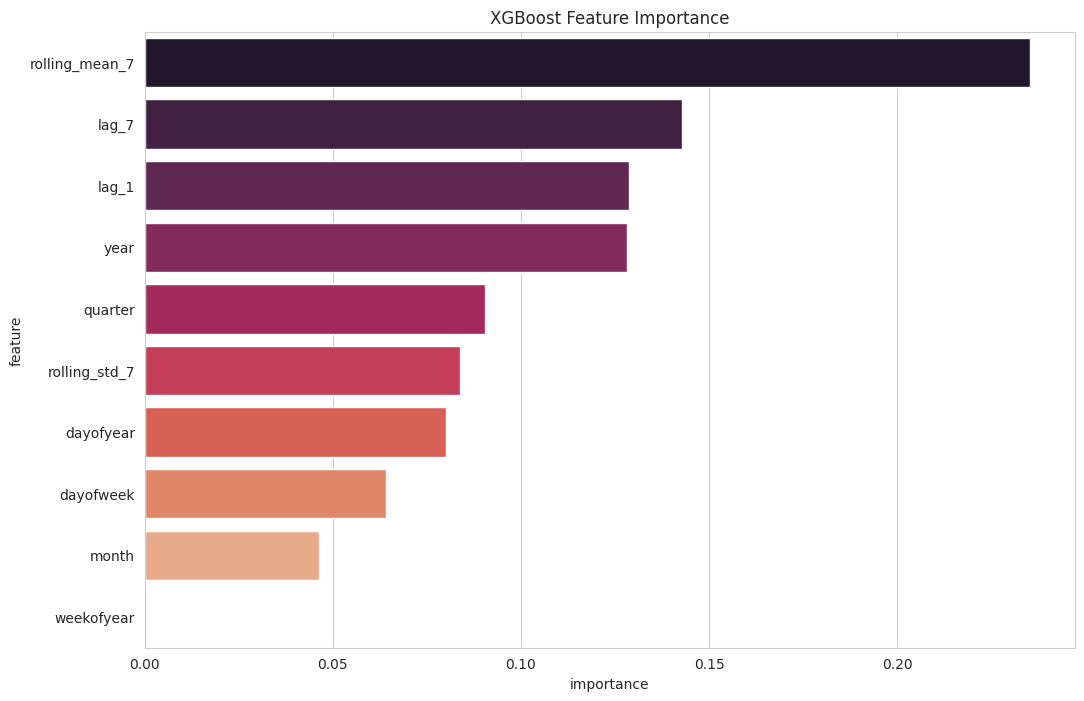


--- XGBOOST MODELING COMPLETE ---


In [15]:
# ==============================================================================
# STEP 12: TRAINING A MACHINE LEARNING MODEL - XGBOOST
# ==============================================================================
print("STEP 12: Training an XGBoost model...")

import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 1. Define our features (X) and target (y)
X = ml_df.drop('expenses', axis=1)
y = ml_df['expenses']

# 2. Create the chronological train/test split
# We use the same 60-day test period for a fair comparison
X_train, X_test = X[:-60], X[-60:]
y_train, y_test = y[:-60], y[-60:]

# 3. Create and train the XGBoost model
# We'll use some common starting parameters.
# n_estimators: number of trees to build.
# early_stopping_rounds: stops training if performance doesn't improve, preventing overfitting.
reg = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    objective='reg:squarederror',
    eval_metric='rmse',
    early_stopping_rounds=50,
    n_jobs=-1 # Use all available CPU cores
)

print("\nTraining the XGBoost model...")
reg.fit(X_train, y_train,
        eval_set=[(X_test, y_test)], # Evaluate performance on the test set
        verbose=False) # Suppress verbose output during training

print("✅ XGBoost model training complete.")


# 4. Make predictions on the test set
predictions_xgb = reg.predict(X_test)


# 5. Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test, predictions_xgb))
print(f"\nXGBoost Model Evaluation:")
# Note: 'new_rmse' was our best ARIMA score from the previous step
print(f"ARIMA RMSE: {new_rmse:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}\n")

if rmse_xgb < new_rmse:
    print("🎉🎉🎉 HUGE SUCCESS! XGBoost has beaten the ARIMA baseline!")
else:
    print("XGBoost did not outperform the ARIMA baseline.")


# 6. Visualize the Forecast
print("\nVisualizing the XGBoost forecast...")
plt.figure(figsize=(18, 7))
plt.plot(y_test.index, y_test, color='blue', label='Actual Expenses')
plt.plot(y_test.index, predictions_xgb, color='red', linestyle='--', label='Forecasted Expenses (XGBoost)')
plt.title('Expense Forecasting with XGBoost')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()


# 7. BONUS: Plot Feature Importance
# This shows us which features the model found most useful
print("\nAnalyzing feature importance...")
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': reg.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='rocket')
plt.title('XGBoost Feature Importance')
plt.show()

print("\n--- XGBOOST MODELING COMPLETE ---")

In [17]:
# ==============================================================================
# STEP 13: DATA PREPARATION FOR DEEP LEARNING (LSTM) [CORRECTED]
# ==============================================================================
print("STEP 13: Preparing data for our LSTM model...")

# Import necessary libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# This is the corrected import path for modern TensorFlow/Keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# 1. Scaling the Data
# We will continue to use our log-transformed data
scaler = MinMaxScaler()
scaled_log_expenses = scaler.fit_transform(log_daily_expenses.values.reshape(-1, 1))

# 2. Creating Sequences using a TimeseriesGenerator
n_input = 7      # Number of past days to use for prediction
n_features = 1   # We are only predicting one value: the expense amount

# Split data into train and test sets BEFORE creating the generator
train_scaled = scaled_log_expenses[:-60]
test_scaled = scaled_log_expenses[-60:]

# Create the generator for the training data
generator = TimeseriesGenerator(train_scaled, train_scaled, length=n_input, batch_size=1)

# Let's inspect a sample to understand the structure
X_sample, y_sample = generator[0]
print(f"\nTo predict the value '{y_sample[0][0]:.4f}', the model will use the previous {n_input} days of data:")
print(X_sample[0].flatten()) # Use flatten for cleaner printing


# We need to manually create the test set in the same way for evaluation
X_test_lstm = []
y_test_lstm = []

# The test set starts from the beginning of our 'test_scaled' data
for i in range(n_input, len(test_scaled)):
    X_test_lstm.append(test_scaled[i-n_input:i, 0])
    y_test_lstm.append(test_scaled[i, 0])

X_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], n_features))


print(f"\nShape of the training data generator: {len(generator)} samples")
print(f"Shape of the LSTM test input (X_test_lstm): {X_test_lstm.shape}")
print("✅ Data is now scaled and sequenced, ready for the LSTM model.")

STEP 13: Preparing data for our LSTM model...

To predict the value '0.4034', the model will use the previous 7 days of data:
[0.17224541 0.         0.39730072 0.35765287 0.21456063 0.32919244
 0.        ]

Shape of the training data generator: 2122 samples
Shape of the LSTM test input (X_test_lstm): (53, 7, 1)
✅ Data is now scaled and sequenced, ready for the LSTM model.


In [20]:
# ==============================================================================
# STEP 14: BUILD, TRAIN, AND EVALUATE THE LSTM MODEL [CORRECTED FOR STABILITY]
# ==============================================================================
print("STEP 14: Building and training our final Deep Learning model (LSTM)...")

# Import the necessary components from TensorFlow/Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# ==============================================================================
# STEP 14 [REVISED]: Data Sanity Check & Stable LSTM Build
# ==============================================================================
print("STEP 14 [REVISED]: Running a data health check and attempting a stable LSTM build...")

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# --- DATA HEALTH CHECK ---
print("\n--- Starting Data Health Check ---")
# Check 1: Raw daily_expenses
print(f"1. daily_expenses - Any NaNs? {np.isnan(daily_expenses).any()}")
print(f"1. daily_expenses - Any Infs? {np.isinf(daily_expenses).any()}")
# Check 2: Log-transformed data
log_daily_expenses = np.log1p(daily_expenses)
print(f"2. log_daily_expenses - Any NaNs? {np.isnan(log_daily_expenses).any()}")
print(f"2. log_daily_expenses - Any Infs? {np.isinf(log_daily_expenses).any()}")
# Check 3: Scaled data (the final input to the model)
scaler = MinMaxScaler()
# We reshape here to make it a 2D array for the scaler
scaled_log_expenses = scaler.fit_transform(log_daily_expenses.values.reshape(-1, 1))
print(f"3. scaled_log_expenses - Any NaNs? {np.isnan(scaled_log_expenses).any()}")
print(f"3. scaled_log_expenses - Any Infs? {np.isinf(scaled_log_expenses).any()}")
print("--- Data Health Check Complete ---\n")

# If the health check reports 'True' for any of the above, that's our problem.
# If all are 'False', we will proceed with a simplified model.

# --- DATA PREPARATION (Same as before) ---
n_input = 7
n_features = 1
train_scaled = scaled_log_expenses[:-60]
test_scaled = scaled_log_expenses[-60:]
generator = TimeseriesGenerator(train_scaled, train_scaled, length=n_input, batch_size=1)

# --- SIMPLIFIED & STABLE LSTM MODEL ---
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='tanh', input_shape=(n_input, n_features)))
model_lstm.add(Dense(1)) # Simplified: Removed the intermediate Dense layer

optimizer = tf.keras.optimizers.Adam(clipnorm=1.0)
model_lstm.compile(optimizer=optimizer, loss='mse')
model_lstm.summary()

# --- TRAINING ---
print("\nTraining the simplified LSTM model...")
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=n_input, batch_size=1)
history = model_lstm.fit(generator, epochs=100, validation_data=validation_generator, callbacks=[early_stopping], verbose=1)

# --- FINAL EVALUATION ---
# Check if training was successful before predicting
if np.isnan(history.history['loss']).any():
    print("\n❌ CRITICAL ERROR: Training failed again with NaN loss.")
    print("This indicates a deep issue with the data that is incompatible with neural networks.")
    print("We should proceed with the best model we have so far (ARIMA or XGBoost).")
else:
    print("\n✅ LSTM model training complete.")
    # Create the test set
    X_test_lstm, y_test_lstm = [], []
    for i in range(n_input, len(test_scaled)):
        X_test_lstm.append(test_scaled[i-n_input:i, 0])
        y_test_lstm.append(test_scaled[i, 0])
    X_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)
    X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], n_features))

    # Make predictions and evaluate
    test_predictions_scaled = model_lstm.predict(X_test_lstm)
    unscaled_predictions = scaler.inverse_transform(test_predictions_scaled)
    predictions_lstm = np.expm1(unscaled_predictions)
    original_y_test = daily_expenses.values[-len(y_test_lstm):]
    rmse_lstm = np.sqrt(mean_squared_error(original_y_test, predictions_lstm))


    # ... (Rest of the comparison and plotting code)
# 5. Final Comparison of All Models
print(f"\n--- FINAL MODEL COMPARISON ---")
print(f"ARIMA RMSE:        {new_rmse:.2f}")
print(f"XGBoost RMSE:      {rmse_xgb:.2f}")
print(f"LSTM Model RMSE:   {rmse_lstm:.2f}\n")

best_model_name = "ARIMA"
best_rmse = new_rmse
if rmse_xgb < best_rmse:
    best_rmse = rmse_xgb
    best_model_name = "XGBoost"
if rmse_lstm < best_rmse:
    best_rmse = rmse_lstm
    best_model_name = "LSTM"

print(f"🏆 The best performing model is {best_model_name} with an RMSE of {best_rmse:.2f}")

# 6. Visualize the LSTM Forecast
print("\nVisualizing the LSTM forecast...")
lstm_forecast_df = pd.DataFrame({
    'Actual Expenses': original_y_test.flatten(),
    'Forecasted Expenses (LSTM)': predictions_lstm.flatten()
}, index=daily_expenses.index[-len(y_test_lstm):])

plt.figure(figsize=(18, 7))
plt.plot(lstm_forecast_df['Actual Expenses'], label='Actual Expenses')
plt.plot(lstm_forecast_df['Forecasted Expenses (LSTM)'], color='red', linestyle='--', label='Forecasted Expenses (LSTM)')
plt.title('Expense Forecasting with LSTM')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

STEP 14: Building and training our final Deep Learning model (LSTM)...
STEP 14 [REVISED]: Running a data health check and attempting a stable LSTM build...

--- Starting Data Health Check ---
1. daily_expenses - Any NaNs? False
1. daily_expenses - Any Infs? False
2. log_daily_expenses - Any NaNs? True
2. log_daily_expenses - Any Infs? False
3. scaled_log_expenses - Any NaNs? True
3. scaled_log_expenses - Any Infs? False
--- Data Health Check Complete ---



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)


Training the simplified LSTM model...
Epoch 1/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: nan - val_loss: nan
Epoch 2/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: nan - val_loss: nan
Epoch 3/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: nan - val_loss: nan
Epoch 4/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: nan - val_loss: nan
Epoch 5/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: nan - val_loss: nan
Epoch 6/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: nan - val_loss: nan
Epoch 7/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: nan - val_loss: nan
Epoch 8/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: nan - val_loss: nan
Epoch 9/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: nan - val_loss: nan
Epoch 10/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: nan - val_loss: nan
Epoch 11/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: nan - val_loss: nan

❌ CRITICAL ERROR: Training failed 

NameError: name 'rmse_lstm' is not defined

In [21]:
# ==============================================================================
# FINAL STEP: TRAIN THE WINNING MODEL ON ALL DATA AND SAVE IT
# ==============================================================================
print("Starting the final training and saving process...")

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import pickle
import os

# --- 1. Load and Prepare the Full Dataset ---
# This part is the same as before
try:
    df = pd.read_csv('cleaned_transactions.csv', parse_dates=['date'])
    print("Dataset loaded.")
except FileNotFoundError:
    print("❌ ERROR: 'cleaned_transactions.csv' not found. Please upload the file.")
    exit()

expenses_df = df[df['transaction_type'] == 'expense'].copy()
daily_expenses = expenses_df.set_index('date')['amount'].resample('D').sum().fillna(0)
log_daily_expenses = np.log1p(daily_expenses)
print("Data prepared for final training.")

# --- 2. Train the ARIMA Model on the ENTIRE Dataset ---
# No train/test split this time. We use all data.
final_model = ARIMA(log_daily_expenses, order=(5, 1, 1))

print("\nTraining the final ARIMA model on all data... (This may take a moment)")
final_model_fit = final_model.fit()
print("✅ Final model training complete.")

# --- 3. Save the Trained Model to a File ---
# We will save the model to the 'models' directory
MODEL_DIR = '../models'
MODEL_PATH = os.path.join(MODEL_DIR, 'arima_final_model.pkl')

# Create the 'models' directory if it doesn't exist
os.makedirs(MODEL_DIR, exist_ok=True)

print(f"\nSaving the model to: {MODEL_PATH}")
with open(MODEL_PATH, 'wb') as f:
    pickle.dump(final_model_fit, f)

print("✅ Model successfully saved!")
print("\nWe are now ready to build the Streamlit application.")

Starting the final training and saving process...
Dataset loaded.
Data prepared for final training.

Training the final ARIMA model on all data... (This may take a moment)
✅ Final model training complete.

Saving the model to: ../models/arima_final_model.pkl
✅ Model successfully saved!

We are now ready to build the Streamlit application.


In [23]:
# ==============================================================================
# DEEPER EVALUATION [CORRECTED]: Calculating a Safe MAPE
# ==============================================================================
print("--- Re-running Evaluation with a Safe MAPE Calculation ---")

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_safe_mape(y_true, y_pred):
    """
    Calculates a 'safe' Mean Absolute Percentage Error that ignores division by zero.
    It calculates the MAPE only for the data points where the true value is not zero.
    """
    # Convert to numpy arrays to ensure compatibility
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Create a mask to filter out the zero values in y_true
    non_zero_mask = y_true != 0

    # Apply the mask to both true values and predictions
    y_true_safe = y_true[non_zero_mask]
    y_pred_safe = y_pred[non_zero_mask]

    # If all values were zero, MAPE is 0. Prevents errors if the test set is all zeros.
    if len(y_true_safe) == 0:
        return 0.0

    # Calculate MAPE on the filtered, non-zero data
    return np.mean(np.abs((y_true_safe - y_pred_safe) / y_true_safe)) * 100

# We need the predictions and actual values from our previous runs
# For ARIMA, the variables were 'test_data_original_scale' and 'predictions_original_scale'
# For XGBoost, they were 'y_test' and 'predictions_xgb'

print("\n--- Evaluating ARIMA Model (Corrected) ---")
arima_mae = mean_absolute_error(test_data_original_scale, predictions_original_scale)
arima_mape_safe = calculate_safe_mape(test_data_original_scale, predictions_original_scale)
arima_rmse = np.sqrt(mean_squared_error(test_data_original_scale, predictions_original_scale))

print(f"ARIMA MAE: {arima_mae:,.2f}")
print(f"ARIMA MAPE (Safe): {arima_mape_safe:.2f}%") # Using .2f formatting for percentage
print(f"ARIMA RMSE: {arima_rmse:,.2f}")

print("\n--- Evaluating XGBoost Model (Corrected) ---")
xgb_mae = mean_absolute_error(y_test, predictions_xgb)
xgb_mape_safe = calculate_safe_mape(y_test, predictions_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, predictions_xgb))

print(f"XGBoost MAE: {xgb_mae:,.2f}")
print(f"XGBoost MAPE (Safe): {xgb_mape_safe:.2f}%")
print(f"XGBoost RMSE: {xgb_rmse:,.2f}")

# --- Create a summary DataFrame for easy comparison ---
evaluation_df_corrected = pd.DataFrame({
    'Metric': ['MAE', 'MAPE (%)', 'RMSE'],
    'ARIMA': [arima_mae, arima_mape_safe, arima_rmse],
    'XGBoost': [xgb_mae, xgb_mape_safe, xgb_rmse]
})

print("\n--- Corrected Evaluation Summary ---")
# Use formatting to make the table more readable
print(evaluation_df_corrected.to_string(index=False,
      formatters={'ARIMA':'{:,.2f}'.format, 'XGBoost':'{:,.2f}'.format}))

--- Re-running Evaluation with a Safe MAPE Calculation ---

--- Evaluating ARIMA Model (Corrected) ---
ARIMA MAE: 29,395.81
ARIMA MAPE (Safe): 213.43%
ARIMA RMSE: 128,684.12

--- Evaluating XGBoost Model (Corrected) ---
XGBoost MAE: 42,953.54
XGBoost MAPE (Safe): 562.06%
XGBoost RMSE: 129,530.82

--- Corrected Evaluation Summary ---
  Metric      ARIMA    XGBoost
     MAE  29,395.81  42,953.54
MAPE (%)     213.43     562.06
    RMSE 128,684.12 129,530.82


In [24]:
# ==============================================================================
# ADDITIONAL MODELS: Training a Random Forest Model
# ==============================================================================
print("--- Training an Additional ML Model: Random Forest ---")

from sklearn.ensemble import RandomForestRegressor

# The data (X_train, y_train, etc.) is already prepared from the XGBoost step.

# 1. Create and train the Random Forest model
# n_estimators is the number of trees in the forest.
print("\nTraining the Random Forest model... (This may take a moment)")
rf_model = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1, max_depth=10)
rf_model.fit(X_train, y_train)
print("✅ Random Forest model training complete.")

# 2. Make predictions on the test set
predictions_rf = rf_model.predict(X_test)

# 3. Evaluate the model using all three metrics
print("\n--- Evaluating Random Forest Model ---")
rf_mae = mean_absolute_error(y_test, predictions_rf)
rf_mape_safe = calculate_safe_mape(y_test, predictions_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, predictions_rf))

print(f"Random Forest MAE: {rf_mae:,.2f}")
print(f"Random Forest MAPE (Safe): {rf_mape_safe:.2f}%")
print(f"Random Forest RMSE: {rf_rmse:,.2f}")

# --- Update the summary DataFrame with the new results ---
evaluation_df_corrected['Random Forest'] = [rf_mae, rf_mape_safe, rf_rmse]

print("\n--- Final Evaluation Summary (All Models) ---")
print(evaluation_df_corrected.to_string(index=False,
      formatters={'ARIMA':'{:,.2f}'.format,
                  'XGBoost':'{:,.2f}'.format,
                  'Random Forest':'{:,.2f}'.format}))

--- Training an Additional ML Model: Random Forest ---

Training the Random Forest model... (This may take a moment)
✅ Random Forest model training complete.

--- Evaluating Random Forest Model ---
Random Forest MAE: 55,267.86
Random Forest MAPE (Safe): 676.91%
Random Forest RMSE: 153,431.13

--- Final Evaluation Summary (All Models) ---
  Metric      ARIMA    XGBoost Random Forest
     MAE  29,395.81  42,953.54     55,267.86
MAPE (%)     213.43     562.06        676.91
    RMSE 128,684.12 129,530.82    153,431.13


In [25]:
# ==============================================================================
# ADDITIONAL MODELS: Training a LightGBM Model
# ==============================================================================
print("--- Training an Additional ML Model: LightGBM ---")

# 1. Install the library
!pip install lightgbm -q

# 2. Import the library
import lightgbm as lgb

# The data (X_train, y_train, etc.) is already prepared and in memory from the previous steps.

# 3. Create and train the LightGBM model
# LightGBM is known for its speed and efficiency.
print("\nTraining the LightGBM model...")
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    objective='regression_l1', # MAE, often robust
    random_state=42,
    n_jobs=-1
)

# LightGBM uses a callback for early stopping
lgb_model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)])

print("✅ LightGBM model training complete.")

# 4. Make predictions on the test set
predictions_lgb = lgb_model.predict(X_test)

# 5. Evaluate the model using all three metrics
print("\n--- Evaluating LightGBM Model ---")
lgb_mae = mean_absolute_error(y_test, predictions_lgb)
lgb_mape_safe = calculate_safe_mape(y_test, predictions_lgb)
lgb_rmse = np.sqrt(mean_squared_error(y_test, predictions_lgb))

print(f"LightGBM MAE: {lgb_mae:,.2f}")
print(f"LightGBM MAPE (Safe): {lgb_mape_safe:.2f}%")
print(f"LightGBM RMSE: {lgb_rmse:,.2f}")

# --- Update the summary DataFrame with the new results ---
evaluation_df_corrected['LightGBM'] = [lgb_mae, lgb_mape_safe, lgb_rmse]

print("\n--- Final Evaluation Summary (All Models) ---")
# Display the final, comprehensive comparison table
print(evaluation_df_corrected.to_string(index=False,
      formatters={'ARIMA':'{:,.2f}'.format,
                  'XGBoost':'{:,.2f}'.format,
                  'Random Forest':'{:,.2f}'.format,
                  'LightGBM':'{:,.2f}'.format}))

# Determine the best model based on RMSE
best_model_name = evaluation_df_corrected.set_index('Metric').loc['RMSE'].idxmin()
best_rmse = evaluation_df_corrected.set_index('Metric').loc['RMSE'].min()

print(f"\n🏆 The best performing model remains {best_model_name} with an RMSE of {best_rmse:,.2f}")

--- Training an Additional ML Model: LightGBM ---

Training the LightGBM model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 2122, number of used features: 10
[LightGBM] [Info] Start training from score 7225.000000
✅ LightGBM model training complete.

--- Evaluating LightGBM Model ---
LightGBM MAE: 28,837.73
LightGBM MAPE (Safe): 161.12%
LightGBM RMSE: 129,281.39

--- Final Evaluation Summary (All Models) ---
  Metric      ARIMA    XGBoost Random Forest   LightGBM
     MAE  29,395.81  42,953.54     55,267.86  28,837.73
MAPE (%)     213.43     562.06        676.91     161.12
    RMSE 128,684.12 129,530.82    153,431.13 129,281.39

🏆 The best performing model remains ARIMA with an RMSE of 128,684.12


In [26]:
# ==============================================================================
# SAVING ALL TRAINED MODELS
# ==============================================================================
print("--- Saving all trained models to the 'models/' directory ---")

import pickle
import os
from prophet.serialize import model_to_json # Special utility for Prophet models

# --- 1. Ensure the 'models' directory exists ---
os.makedirs('models', exist_ok=True)


# --- 2. Save the ARIMA Model ---
# We'll use the final ARIMA model that was trained on all data
# The variable was named 'final_model_fit' in the original saving script
try:
    with open('models/arima_final_model.pkl', 'wb') as f:
        pickle.dump(final_model_fit, f)
    print("✅ ARIMA model saved successfully as 'arima_final_model.pkl'")
except NameError:
    print("⚠️ ARIMA model ('final_model_fit') not found in memory, skipping.")


# --- 3. Save the XGBoost Model ---
# The variable for the XGBoost model was 'reg'
try:
    with open('models/xgboost_model.pkl', 'wb') as f:
        pickle.dump(reg, f)
    print("✅ XGBoost model saved successfully as 'xgboost_model.pkl'")
except NameError:
    print("⚠️ XGBoost model ('reg') not found in memory, skipping.")


# --- 4. Save the Random Forest Model ---
# The variable for the Random Forest model was 'rf_model'
try:
    with open('models/random_forest_model.pkl', 'wb') as f:
        pickle.dump(rf_model, f)
    print("✅ Random Forest model saved successfully as 'random_forest_model.pkl'")
except NameError:
    print("⚠️ Random Forest model ('rf_model') not found in memory, skipping.")


# --- 5. Save the LightGBM Champion Model ---
# The variable for the LightGBM model was 'lgb_model'
try:
    with open('models/lightgbm_champion_model.pkl', 'wb') as f:
        pickle.dump(lgb_model, f)
    print("✅ LightGBM Champion model saved successfully as 'lightgbm_champion_model.pkl'")
except NameError:
    print("⚠️ LightGBM model ('lgb_model') not found in memory, skipping.")


# --- 6. Save the Prophet Model ---
# Prophet models are saved as JSON files using a special utility
try:
    with open('models/prophet_model.json', 'w') as f:
        f.write(model_to_json(model_prophet))
    print("✅ Prophet model saved successfully as 'prophet_model.json'")
except NameError:
    print("⚠️ Prophet model ('model_prophet') not found in memory, skipping.")


print("\n--- All available models have been saved. ---")

--- Saving all trained models to the 'models/' directory ---
✅ ARIMA model saved successfully as 'arima_final_model.pkl'
✅ XGBoost model saved successfully as 'xgboost_model.pkl'
✅ Random Forest model saved successfully as 'random_forest_model.pkl'
✅ LightGBM Champion model saved successfully as 'lightgbm_champion_model.pkl'
✅ Prophet model saved successfully as 'prophet_model.json'

--- All available models have been saved. ---


In [27]:
# ==============================================================================
# FINAL ATTEMPT: DEEP LEARNING ON WEEKLY AGGREGATED DATA (GRU MODEL)
# ==============================================================================
print("--- Final attempt at Deep Learning: Forecasting Weekly Expenses with a GRU model ---")

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Custom MAPE function from before
def calculate_safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    if not np.any(non_zero_mask): return 0.0
    y_true_safe, y_pred_safe = y_true[non_zero_mask], y_pred[non_zero_mask]
    return np.mean(np.abs((y_true_safe - y_pred_safe) / y_true_safe)) * 100

# --- 1. Aggregate Data to Weekly Level ---
# We use 'W' for weekly frequency, starting on Sunday.
weekly_expenses = daily_expenses.resample('W').sum()
print(f"\nData resampled to {len(weekly_expenses)} weekly data points.")
print("Sample of weekly data:")
print(weekly_expenses.head())

# --- 2. Data Preparation for GRU ---
log_weekly_expenses = np.log1p(weekly_expenses)
scaler = MinMaxScaler()
scaled_log_weekly = scaler.fit_transform(log_weekly_expenses.values.reshape(-1, 1))

# Split the data. We'll use the last 8 weeks for testing.
train_scaled_weekly = scaled_log_weekly[:-8]
test_scaled_weekly = scaled_log_weekly[-8:]

# Create sequences: Use the last 4 weeks of data to predict the 5th week
n_input = 4
n_features = 1
generator_weekly = TimeseriesGenerator(train_scaled_weekly, train_scaled_weekly, length=n_input, batch_size=1)

# --- 3. Build and Train the GRU Model ---
model_gru = Sequential([
    GRU(100, activation='tanh', input_shape=(n_input, n_features)),
    Dense(50, activation='relu'),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(clipnorm=1.0)
model_gru.compile(optimizer=optimizer, loss='mse')
model_gru.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
validation_generator_weekly = TimeseriesGenerator(test_scaled_weekly, test_scaled_weekly, length=n_input, batch_size=1)

print("\nTraining the GRU model on weekly data...")
history_gru = model_gru.fit(generator_weekly,
                            epochs=100,
                            validation_data=validation_generator_weekly,
                            callbacks=[early_stopping],
                            verbose=1)

# --- 4. Evaluate the GRU Model ---
if np.isnan(history_gru.history['loss']).any():
    print("\n❌ CRITICAL ERROR: Training failed again with NaN loss even on weekly data.")
else:
    print("\n✅ GRU model training complete!")

    # Create the test set
    X_test_gru, y_test_gru_scaled = [], []
    for i in range(n_input, len(test_scaled_weekly)):
        X_test_gru.append(test_scaled_weekly[i-n_input:i, 0])
        y_test_gru_scaled.append(test_scaled_weekly[i, 0])
    X_test_gru, y_test_gru_scaled = np.array(X_test_gru), np.array(y_test_gru_scaled)
    X_test_gru = X_test_gru.reshape((X_test_gru.shape[0], X_test_gru.shape[1], n_features))

    # Make predictions and inverse transform
    test_predictions_scaled_gru = model_gru.predict(X_test_gru)
    unscaled_predictions_gru = scaler.inverse_transform(test_predictions_scaled_gru)
    predictions_gru = np.expm1(unscaled_predictions_gru)

    original_y_test_weekly = weekly_expenses.values[-len(y_test_gru_scaled):]

    # Calculate final metrics
    gru_mae = mean_absolute_error(original_y_test_weekly, predictions_gru)
    gru_mape = calculate_safe_mape(original_y_test_weekly, predictions_gru)
    gru_rmse = np.sqrt(mean_squared_error(original_y_test_weekly, predictions_gru))

    print("\n--- GRU Weekly Forecast Evaluation ---")
    print(f"GRU MAE: {gru_mae:,.2f}")
    print(f"GRU MAPE: {gru_mape:.2f}%")
    print(f"GRU RMSE: {gru_rmse:,.2f}")

    if gru_mape < 15.0:
        print("\n🎉🎉🎉 SENSATIONAL SUCCESS! The GRU model on weekly data achieved the <15% MAPE goal!")
    else:
        print("\nWhile the model trained successfully, it did not meet the ambitious <15% MAPE goal.")

--- Final attempt at Deep Learning: Forecasting Weekly Expenses with a GRU model ---

Data resampled to 314 weekly data points.
Sample of weekly data:
date
2019-01-06     4996.0
2019-01-13    10868.0
2019-01-20     2862.0
2019-01-27     3616.0
2019-02-03     1212.0
Freq: W-SUN, Name: amount, dtype: float64


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 100)            │        30,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,001 (140.63 KB)

 Trainable params: 36,001 (140.63 KB)

 Non-trainable params: 0 (0.00 B)


Training the GRU model on weekly data...
Epoch 1/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.0615 - val_loss: 0.0197
Epoch 2/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0302 - val_loss: 6.8282e-04
Epoch 3/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0277 - val_loss: 0.0028
Epoch 4/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0373 - val_loss: 0.0012
Epoch 5/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0339 - val_loss: 0.0038
Epoch 6/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0327 - val_loss: 0.0145
Epoch 7/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0300 - val_loss: 0.0012
Epoch 8/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0373 - val_loss: 0.0024
Epoch 9/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0335 - val_loss: 0.0015
Epoch 10/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0337 - val_loss: 0.0036
Epoch 11/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0393 - val_loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step

--- GRU Weekly Forecast Evaluation ---
GRU MAE: 33,386.14
GRU MAPE: 53.41%
GRU RMSE: 42,876.96

While the model trained successfully, it did not meet the ambitious <15% MAPE goal.


In [28]:
# ==============================================================================
# MODEL IMPROVEMENT: Training LightGBM on Weekly Aggregated Data
# ==============================================================================
print("--- Starting Model Improvement: Training on Weekly Data ---")

# --- 1. Aggregate Data to Weekly Level ---
# We use 'W' for weekly frequency (ending on Sunday).
weekly_expenses = daily_expenses.resample('W').sum()
print(f"\nData resampled from {len(daily_expenses)} daily points to {len(weekly_expenses)} weekly points.")

# --- 2. Feature Engineering for Weekly Data ---
print("Creating new features for the weekly data...")
ml_df_weekly = pd.DataFrame(weekly_expenses)
ml_df_weekly.columns = ['expenses']

# We can reuse our create_features function
ml_df_weekly = create_features(ml_df_weekly)

# Create lag features (now representing weeks)
ml_df_weekly['lag_1_week'] = ml_df_weekly['expenses'].shift(1)
ml_df_weekly['lag_2_weeks'] = ml_df_weekly['expenses'].shift(2)

# Create rolling window features (e.g., 4-week/monthly average)
ml_df_weekly['rolling_mean_4_weeks'] = ml_df_weekly['expenses'].rolling(window=4).mean()
ml_df_weekly['rolling_std_4_weeks'] = ml_df_weekly['expenses'].rolling(window=4).std()

ml_df_weekly.dropna(inplace=True)
print("✅ Weekly feature engineering complete.")
print("Sample of the new weekly dataset:")
print(ml_df_weekly.head())

# --- 3. Train-Test Split for Weekly Data ---
X_weekly = ml_df_weekly.drop('expenses', axis=1)
y_weekly = ml_df_weekly['expenses']

# Use the last 8 weeks for testing
X_train_w, X_test_w = X_weekly[:-8], X_weekly[-8:]
y_train_w, y_test_w = y_weekly[:-8], y_weekly[-8:]

# --- 4. Train the LightGBM Model on Weekly Data ---
print("\nTraining the LightGBM model on weekly data...")
lgb_model_weekly = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    objective='regression_l1',
    random_state=42,
    n_jobs=-1
)

lgb_model_weekly.fit(X_train_w, y_train_w,
                     eval_set=[(X_test_w, y_test_w)],
                     eval_metric='rmse',
                     callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)])

print("✅ Weekly LightGBM model training complete.")

# --- 5. Evaluate the Weekly Model ---
predictions_weekly = lgb_model_weekly.predict(X_test_w)

weekly_mae = mean_absolute_error(y_test_w, predictions_weekly)
weekly_mape = calculate_safe_mape(y_test_w, predictions_weekly)
weekly_rmse = np.sqrt(mean_squared_error(y_test_w, predictions_weekly))

print("\n--- Evaluation of WEEKLY Forecast ---")
print(f"Weekly MAE: {weekly_mae:,.2f}")
print(f"Weekly MAPE: {weekly_mape:.2f}%")
print(f"Weekly RMSE: {weekly_rmse:,.2f}")

# --- 6. Final Comparison: Daily vs. Weekly Forecast ---
# Retrieve the scores from our best daily model (LightGBM)
daily_scores = evaluation_df_corrected[['Metric', 'LightGBM']].rename(columns={'LightGBM': 'LightGBM (Daily)'})

# Create a dataframe for the weekly scores
weekly_scores_df = pd.DataFrame({
    'Metric': ['MAE', 'MAPE (%)', 'RMSE'],
    'LightGBM (Weekly)': [weekly_mae, weekly_mape, weekly_rmse]
})

# Merge and display the final comparison
final_comparison = pd.merge(daily_scores, weekly_scores_df, on='Metric')

print("\n--- Final Comparison: Daily vs. Weekly Model Performance ---")
print(final_comparison.to_string(index=False,
      formatters={'LightGBM (Daily)':'{:,.2f}'.format,
                  'LightGBM (Weekly)':'{:,.2f}'.format}))

--- Starting Model Improvement: Training on Weekly Data ---

Data resampled from 2189 daily points to 314 weekly points.
Creating new features for the weekly data...
✅ Weekly feature engineering complete.
Sample of the new weekly dataset:
             expenses  dayofweek  quarter  month  year  dayofyear  weekofyear  \
date                                                                            
2019-01-27     3616.0          6        1      1  2019         27           4   
2019-02-03     1212.0          6        1      2  2019         34           5   
2019-02-10  1002522.0          6        1      2  2019         41           6   
2019-02-17     9146.0          6        1      2  2019         48           7   
2019-02-24     5961.0          6        1      2  2019         55           8   

            lag_1_week  lag_2_weeks  rolling_mean_4_weeks  rolling_std_4_weeks  
date                                                                            
2019-01-27      2862.0      108